In [1]:
# the idea is to use different machine learning models to figure out one which works the best for bitcoin prediction.
# the data has been taken from cryptodatadownload, 100 points of data on a daily basis.


In [2]:
#first we import the necessary packages
import pandas as pd
import numpy as np


In [3]:
#for plotting we use matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [5]:
#for normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [6]:
#reading the file
df = pd.read_csv('C://Users//Pratibha.Pratibha-PC//Desktop//Cryptocurrency Project//Crypto_Data_Binance.csv')
df.head(10)

,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME BTC,VOLUME USDT
0,6/13/2020,9465.13,9477.18,9362.08,9398.00,6841.07,6.441972e+07
1,6/12/2020,9280.40,9557.12,9232.51,9465.13,50119.07,4.720079e+08
2,6/11/2020,9885.00,9964.00,9113.00,9280.40,94418.98,9.020756e+08
3,6/10/2020,9772.43,9992.72,9704.18,9885.00,47130.76,4.623843e+08
4,6/9/2020,9782.01,9877.00,9570.00,9772.43,46024.00,4.472089e+08
5,6/8/2020,9746.99,9800.00,9633.00,9782.01,40664.66,3.954594e+08
6,6/7/2020,9666.30,9802.00,9372.46,9746.99,57952.85,5.569196e+08
7,6/6/2020,9621.16,9735.00,9531.05,9666.30,32752.95,3.156049e+08
8,6/5/2020,9789.06,9854.75,9581.00,9621.16,47788.05,4.652008e+08
9,6/4/2020,9666.24,9881.63,9450.00,9789.06,57456.10,5.572349e+08


In [7]:
#setting date as index
df['DATE'] = pd.to_datetime(df.DATE, format= '%m/%d/%Y')
df.index = df['DATE']
df.head()

,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME BTC,VOLUME USDT
DATE,,,,,,,
2020-06-13,2020-06-13,9465.13,9477.18,9362.08,9398.00,6841.07,6.441972e+07
2020-06-12,2020-06-12,9280.40,9557.12,9232.51,9465.13,50119.07,4.720079e+08
2020-06-11,2020-06-11,9885.00,9964.00,9113.00,9280.40,94418.98,9.020756e+08
2020-06-10,2020-06-10,9772.43,9992.72,9704.18,9885.00,47130.76,4.623843e+08
2020-06-09,2020-06-09,9782.01,9877.00,9570.00,9772.43,46024.00,4.472089e+08


C:\Users\Pratibha.Pratibha-PC\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


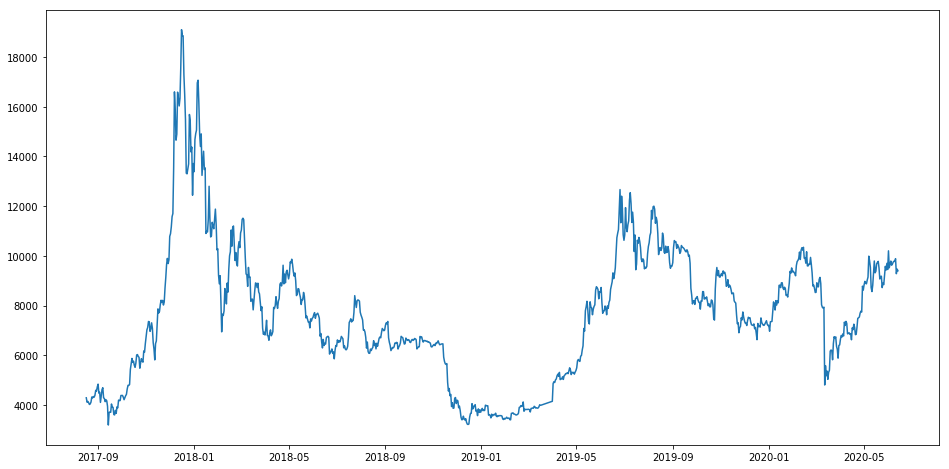

In [8]:
#plotting the graph
plt.figure(figsize=(16,8))
plt.plot(df['CLOSE'],label = 'Closing Price History')

# MOVING AVERAGE

In [9]:
df.shape

(1020, 7)

In [10]:
data = df.sort_index(ascending=True,axis = 0)
new_data = pd.DataFrame(index = range(0,len(df)),columns = ['DATE','CLOSE'])
for i in range(0,len(data)):
    new_data['DATE'][i] = data['DATE'][i]
    new_data['CLOSE'][i] = data['CLOSE'][i]
new_data


,DATE,CLOSE
0,2017-08-17 00:00:00,4285.08
1,2017-08-18 00:00:00,4108.37
2,2017-08-19 00:00:00,4139.98
3,2017-08-20 00:00:00,4086.29
4,2017-08-21 00:00:00,4016
5,2017-08-22 00:00:00,4040
6,2017-08-23 00:00:00,4114.01
7,2017-08-24 00:00:00,4316.01
8,2017-08-25 00:00:00,4280.68
9,2017-08-26 00:00:00,4337.44


In [11]:
train = new_data[:687]
valid = new_data[687:]

In [12]:
train.shape

(687, 2)

In [13]:
valid.shape

(333, 2)

In [14]:
preds = []
for i in range(0,valid.shape[0]):
    a=train['CLOSE'][len(train)-333+i:].sum() + sum(preds)
    b= a/333
    preds.append(b)


In [15]:
#checking the rms value

rms=np.sqrt(np.mean(np.power((np.array(valid['CLOSE'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
2913.258473071995


C:\Users\Pratibha.Pratibha-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Pratibha.Pratibha-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


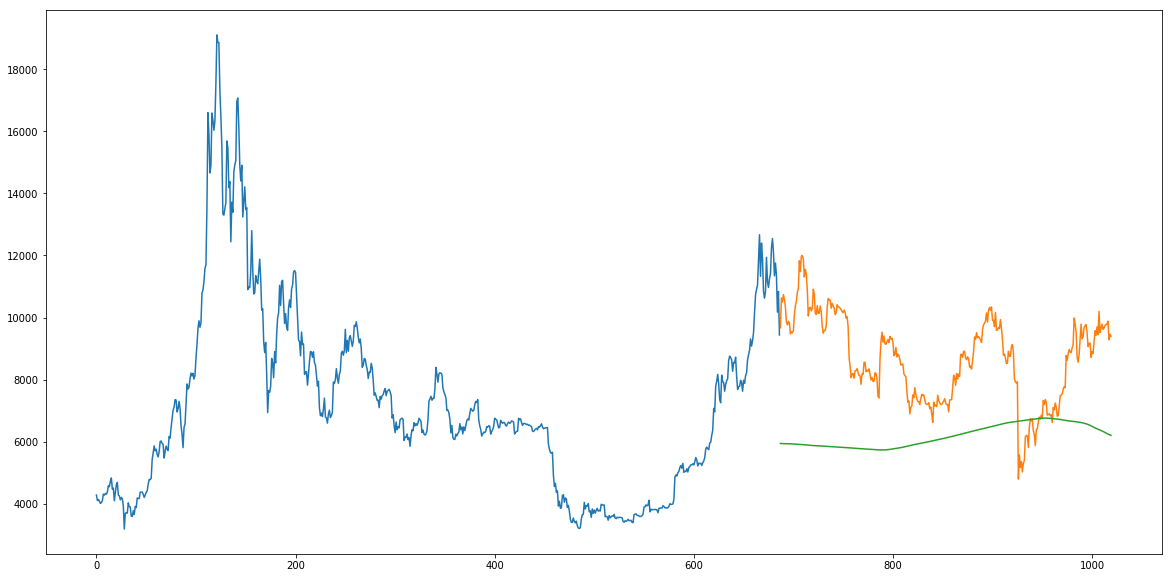

In [ ]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['CLOSE'])
plt.plot(valid[['CLOSE', 'Predictions']])

# K-NEAREST NEIGHBOURS

In [ ]:
import dateutil
new_data['DATE']= pd.to_datetime(new_data['DATE'],format='%m/%d/%Y')
new_data['WEEKDAY']= new_data['DATE'].dt.day_name()
new_data

,DATE,CLOSE,WEEKDAY
0,2017-08-17,4285.08,Thursday
1,2017-08-18,4108.37,Friday
2,2017-08-19,4139.98,Saturday
3,2017-08-20,4086.29,Sunday
4,2017-08-21,4016,Monday
5,2017-08-22,4040,Tuesday
6,2017-08-23,4114.01,Wednesday
7,2017-08-24,4316.01,Thursday
8,2017-08-25,4280.68,Friday
9,2017-08-26,4337.44,Saturday


In [ ]:
new_data1 = new_data.replace(to_replace =['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],value = [0,1,2,3,4,5,6]) 

#split into train and validation
train = new_data1[:687]
valid = new_data1[687:]

x_train = train.drop(['DATE','CLOSE'], axis=1)
y_train = train['CLOSE']
x_valid = valid.drop(['DATE','CLOSE'], axis=1)
y_valid = valid['CLOSE']


In [ ]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)


In [ ]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

2297.378164832831

C:\Users\Pratibha.Pratibha-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Pratibha.Pratibha-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


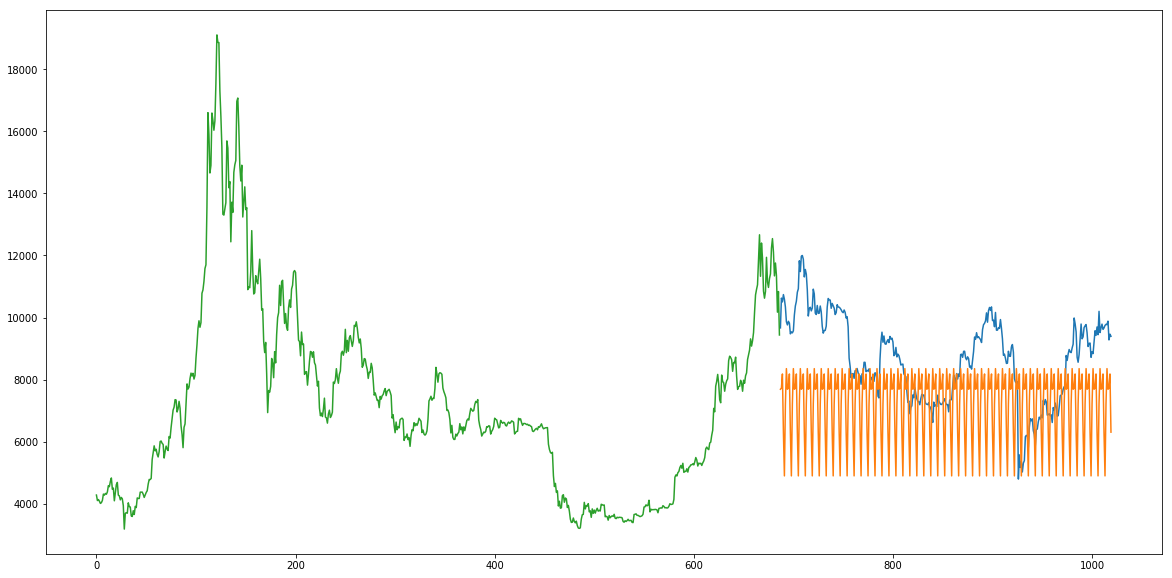

In [ ]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['CLOSE', 'Predictions']])
plt.plot(train['CLOSE'])


# AUTO-ARIMA

In [ ]:
from pmdarima.arima import auto_arima

train = new_data1[:687]
valid = new_data1[687:]

training = train['CLOSE']
validation = valid['CLOSE']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=333)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])


Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=10149.156, BIC=10171.722, Time=15.670 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=10575.582, BIC=10584.609, Time=0.131 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=10394.132, BIC=10412.184, Time=4.360 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=10145.924, BIC=10163.977, Time=14.201 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=10573.598, BIC=10578.111, Time=0.083 seconds
Fit ARIMA(1,1,1)x(0,1,0,12) [intercept=True]; AIC=10536.568, BIC=10554.621, Time=1.991 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,1,1)x(1,1,1,12) [intercept=True]; AIC=10152.092, BIC=1

In [ ]:
rms=np.sqrt(np.mean(np.power((np.array(valid['CLOSE'])-np.array(forecast['Prediction'])),2)))
rms

In [ ]:
#plot
plt.plot(train['CLOSE'])
plt.plot(valid['CLOSE'])
plt.plot(forecast['Prediction'])

# LSTM (RNN)

In [ ]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM


In [ ]:
new_data.head()

In [ ]:
#creating train and test sets
dataset = new_data1.values
dataset

In [ ]:
train = dataset[0:687,:]
valid = dataset[687:,:]


In [ ]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)


In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)


In [ ]:
#predicting 333 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [ ]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)


In [ ]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

In [ ]:
#for plotting
train = new_data[:687]
valid = new_data[9687:]
valid['Predictions'] = closing_price
plt.plot(train['CLOSE'])
plt.plot(valid[['CLOSE','Predictions']])
